# Random variables in computer science

# 1. Introduction

In the realm of computing, generating truly random numbers is fundamentally impossible. This limitation arises from the deterministic nature of computers, which operate on predefined algorithms and logic. Unlike natural phenomena, which can exhibit genuine randomness, a computer's behavior is dictated by a sequence of instructions that always yield predictable outcomes when given the same input.

To address this constraint, computer scientists have developed Pseudo-Random Number Generators (PRNGs). PRNGs use mathematical algorithms to produce sequences of numbers that mimic the statistical properties of randomness. However, these numbers are not truly random; they are deterministic and depend on an initial input called a "seed." Given the same seed, a PRNG will always generate the exact same sequence, making it predictable in theory.

# 2. PRNG

A simple way to generate a seed is to take a random number for the environment like the number of milliseconds of the current hour. Once we have this seed, we can use the Linear Congruential Generator consisting in updating our random number the following way :
$X_{n+1}=(aX_n+c)\mod m$

In [275]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math

In [113]:
def get_seed():
    '''
    Output:
    The number of milliseconds of the current hour
    '''
    return int(time.time() * 1000)%1000

In [121]:
def random(seed, a, c, m):
    '''
    Parameters:
    seed: int, the seed
    a:int
    c:int
    m:int

    Output:
    (random number between 0 and 1, the new seed)
    '''
    for _ in range(100):
        seed = (a * seed + c) % m
    return seed / m, seed

In [123]:
a = 1664525
c = 1013904223
m = 2**32
seed = get_seed()

for _ in range(10):
    value, seed = random(seed, a, c, m)
    print(value)

0.4501854283735156
0.9450750350952148
0.6241201804950833
0.3998014573007822
0.3231683364138007
0.001136530190706253
0.14366816822439432
0.5689597856253386
0.2447631238028407
0.19396374374628067


In [170]:
def random_value():
    '''
    Output:
    A random variables between O and 1
    '''
    a = 1664525
    c = 1013904223
    m = 2**32
    seed = get_seed()
    return random(seed, a, c, m)[0]

In [174]:
random_value()

0.699023790191859

In [165]:
def random_array(n, p):
    '''
    Parameters:
    n: int, number of rows
    m: int, number of columns

    Output:
    M: numpy array, a matrix with independent random numbers between 0 and 1 of size (n,m)
    '''
    a = 1664525
    c = 1013904223
    m = 2**32
    seed = get_seed()  # Initialisation de la graine avant de commencer
    L = []
    for _ in range(n * p):
        value, seed = random(seed, a, c, m)  # La graine évolue à chaque itération
        L.append(value)
    return np.array(L).reshape((n, p))  # Reshape la liste en une matrice (n, m)


In [167]:
random_array(3,4)

array([[0.96600997, 0.7389243 , 0.03506526, 0.79368976],
       [0.07304656, 0.79897246, 0.25665256, 0.46616957],
       [0.8324672 , 0.71035258, 0.77516279, 0.33972041]])

# 3. Generate other random variables

## 3.1. Translation method

As far as here, we are only able to generate random numbers between 0 and 1 ie we can simulate $X\hookrightarrow \mathcal U([0,1])$ but to simulate $Y\hookrightarrow \mathcal U([a,b])$ we can use the fact that $Y=a+(b-a)X$ where $X\hookrightarrow \mathcal U([0,1])$

In [181]:
def random_value(alpha,beta):
    '''
    Output:
    A random variables between alpha and beta
    '''
    a = 1664525
    c = 1013904223
    m = 2**32
    seed = get_seed()
    return alpha + (beta-alpha)*random(seed, a, c, m)[0]

In [185]:
random_value(3,10)

8.495814261259511

## 3.2. Inversion method

### 3.2.1. Distribution function

Let $X$ be a random variable. The distribution function of $X$ is defined as $\forall x \in \mathbb R, F_X(x)=\mathbb P(X\leq x)$.
This function has the following properties :  
$\lim_{x\rightarrow -\infty} F_X(x)=0$  
$\lim_{x\rightarrow +\infty} F_X(x)=1$  
Non-decreasing, right continuous with left limit


#### Example

$X(\Omega)=\{1,2,3\}$ with $\mathbb P(X=1)=0.2$, $\mathbb P(X=2)=0.3$ and $\mathbb P(X=3)=0.5$  
The distribution function is the following :

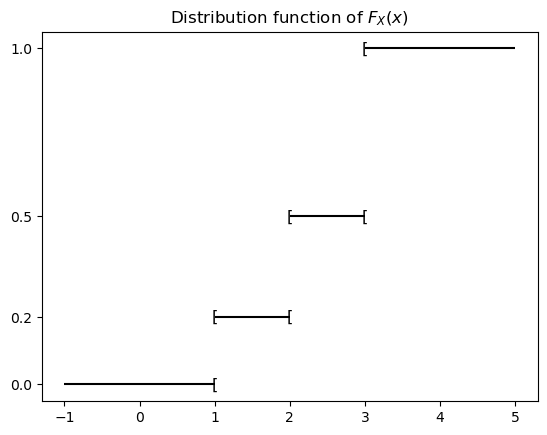

In [249]:
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linestyles='-')
plt.hlines(y=0.2, xmin=1, xmax=2, colors='black', linestyles='-')
plt.hlines(y=0.5, xmin=2, xmax=3, colors='black', linestyles='-')
plt.hlines(y=1, xmin=3, xmax=5, colors='black', linestyles='-')
plt.yticks([0,0.2, 0.5, 1])
points_x = [1, 1, 2,2, 3,3]
points_y = [0, 0.2, 0.2, 0.5,0.5, 1]
for x, y in zip(points_x, points_y):
    plt.text(x,y, '[', fontsize=12, color='black', ha='center', va='center')
plt.title(r"Distribution function of $F_X(x)$")
plt.show()

We then introduce the generalized inverse of the distribution function $\forall t \in ]0,1[, F_X^-(t)=\inf \{x, F_X(x)\geq t\}$.  
In the above example, $F_X^-(0.7)=3$  
When $F_X$ is stricly increasing and continuous then $F_X^-=F_X^{-1}$

#### Proposition

When $U\hookrightarrow \mathcal U([0,1])$ then $F_X^-$ has the same distribution than $X$

### 3.3.2 Exponential random variables

$X\hookrightarrow \epsilon(\lambda)$, then $F_X(x)=(1-e^{-\lambda x})\mathbb I_{x\geq 0}$ so $F_X(x)\geq t\iff x\geq -\frac{ln(1-t)}{\lambda}$ but $1-U$ and $U$ have the same distribution so $-\frac{ln(U)}{\lambda}\hookrightarrow \epsilon(\lambda)$

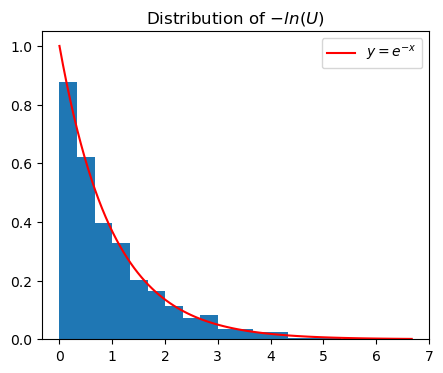

In [279]:
n = 1000
M = random_array(1,n)
R = [-math.log(M[0,j]) for j in range(n)]
x = np.linspace(0,max(R), 100)
y = np.exp(-x)
plt.figure(figsize=(5,4))
plt.title(r"Distribution of $-ln(U)$")
plt.hist(R, bins = 20, density = True)
plt.plot(x,y, label = r"$y=e^{-x}$", color = "red")
plt.legend()
plt.show()